Đỗ Huỳnh Đông - 31231020990

# BT EDA_FIN BUỔI 5

In [1]:
# Import thư viện
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
from IPython.display import display
import yfinance as yf

In [2]:
# Thiết lập thời gian
start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

# Tải dữ liệu cổ phiếu AAPL
df = yf.Ticker('AAPL').history(start=start, end=end, auto_adjust=False) 

print(f'{start} -> {end}')

2016-01-01 00:00:00 -> 2025-09-18 16:24:19.268293


In [3]:
# Lưu và đọc data
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv', parse_dates=True, index_col='Date')

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2016-01-04 00:00:00-05:00,25.652500,26.342501,25.500000,26.337500,23.776180,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,26.437500,26.462500,25.602501,25.677500,23.180365,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,25.139999,25.592501,24.967501,25.174999,22.726730,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,24.670000,25.032499,24.107500,24.112499,21.767563,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,24.637501,24.777500,24.190001,24.240000,21.882662,283192000,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-09-12 00:00:00-04:00,229.220001,234.509995,229.020004,234.070007,234.070007,55824200,0.0,0.0
2025-09-15 00:00:00-04:00,237.000000,238.190002,235.029999,236.699997,236.699997,42699500,0.0,0.0
2025-09-16 00:00:00-04:00,237.179993,241.220001,236.320007,238.149994,238.149994,63421100,0.0,0.0


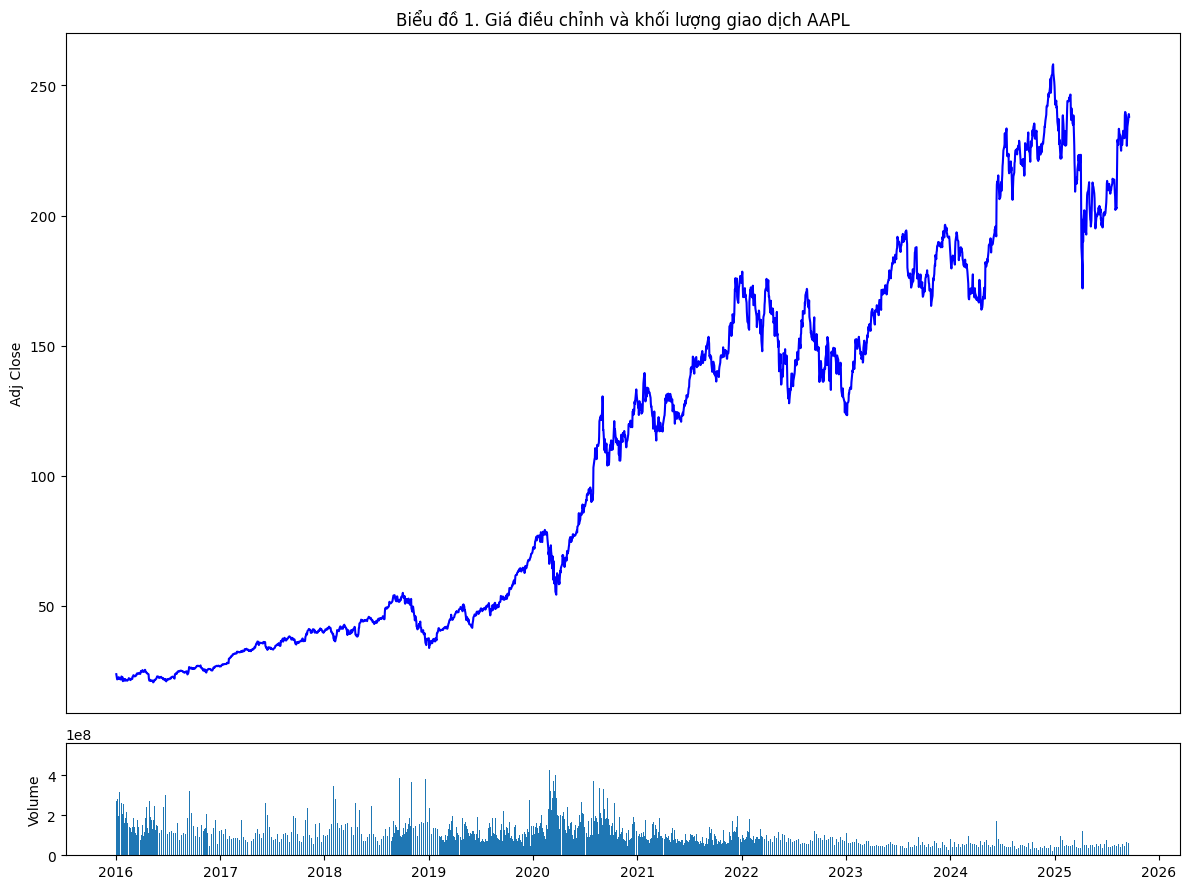

In [5]:
# Biểu đồ 1
plt.figure(figsize=(12,9))
top = plt.subplot2grid((12,9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12,9), (10,0), rowspan=2, colspan=9)

top.plot(df.index, df['Adj Close'], color='blue')   # Giá điều chỉnh theo thời gian
bottom.bar(df.index, df['Volume'])                 # Khối lượng giao dịch dạng cột

top.axes.get_xaxis().set_visible(False)  # Ẩn trục x của biểu đồ trên
top.set_title('Biểu đồ 1. Giá điều chỉnh và khối lượng giao dịch AAPL')
top.set_ylabel('Adj Close')
bottom.set_ylabel('Volume')

plt.tight_layout()
plt.savefig('AAPL_plot1.png', dpi=300)
plt.show()

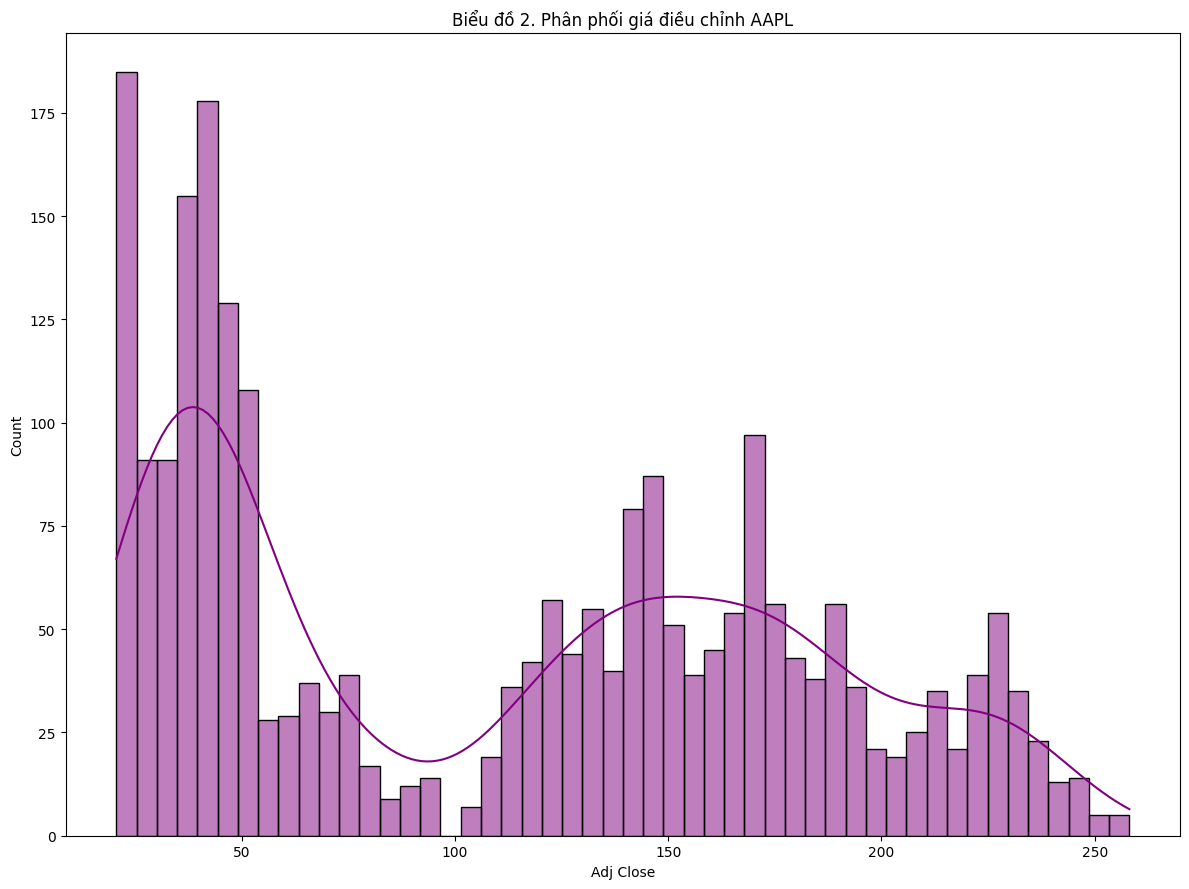

In [6]:
# Biểu đồ 2
plt.figure(figsize=(12,9))
plt.title('Biểu đồ 2. Phân phối giá điều chỉnh AAPL')
sns.histplot(df['Adj Close'].dropna(), bins=50, color='purple', kde=True)

plt.tight_layout()
plt.savefig('AAPL_plot2.png', dpi=300)

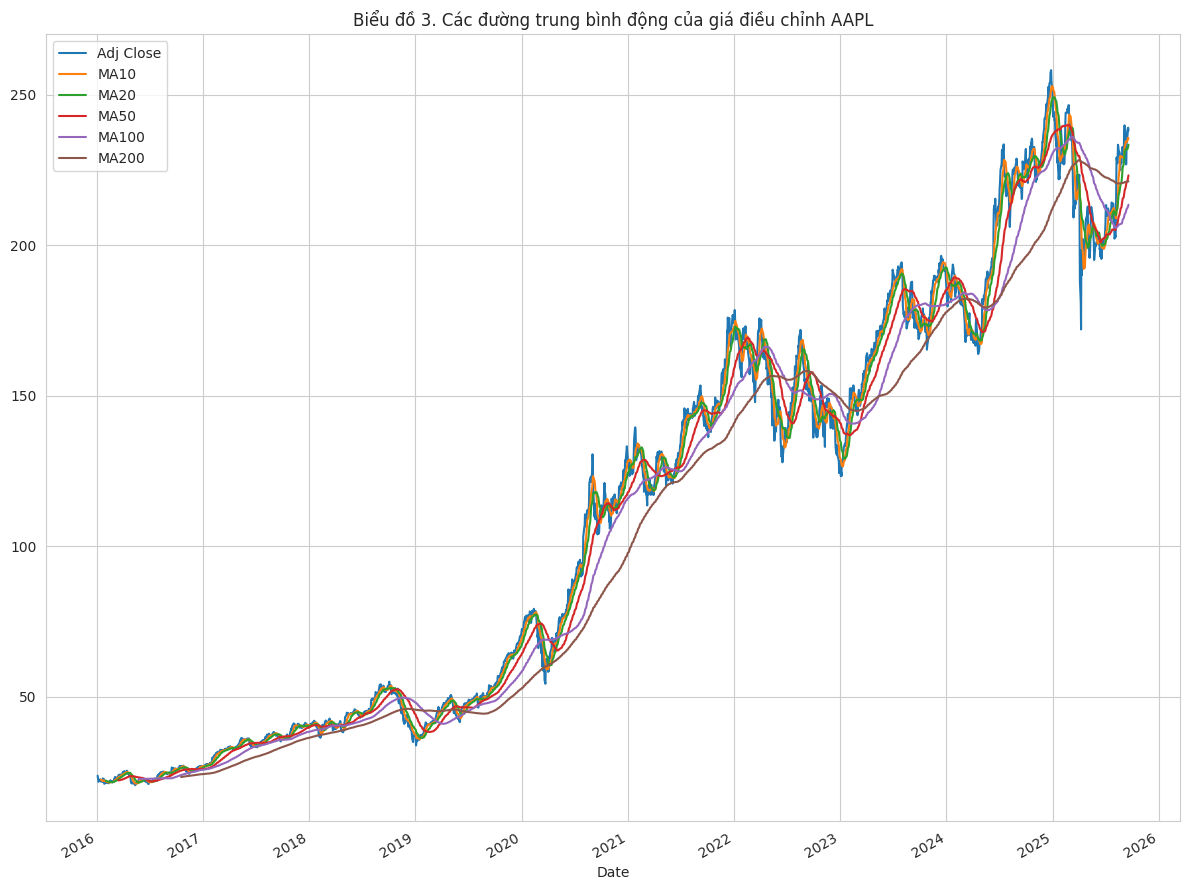

In [7]:
# Biểu đồ 3
# Làm sạch dữ liệu
df = df.dropna()
df = df[df['Adj Close'] != 0]

# Tính các đường trung bình động
df['MA10'] = df['Adj Close'].rolling(10).mean()   # Trung bình 10 ngày
df['MA20'] = df['Adj Close'].rolling(20).mean()  # Trung bình 20 ngày
df['MA50'] = df['Adj Close'].rolling(50).mean()  # Trung bình 50 ngày
df['MA100'] = df['Adj Close'].rolling(100).mean()  # Trung bình 100 ngày
df['MA200'] = df['Adj Close'].rolling(200).mean()  # Trung bình 200 ngày
df2 = pd.DataFrame({'Adj Close': df['Adj Close'],
                    'MA10': df['MA10'],
                    'MA20': df['MA20'],
                    'MA50': df['MA50'],
                   'MA100': df['MA100'],
                   'MA200': df['MA200']})

with sns.axes_style('whitegrid'):
    df2.plot(figsize=(12, 9), legend=True, title='Biểu đồ 3. Các đường trung bình động của giá điều chỉnh AAPL')

plt.tight_layout()
plt.savefig('AAPL_plot3.png', dpi=300)